In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

image_path = "1.png"
original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

def contrast_narrow(image, I_min=150, I_max=160):
    r = image.astype(np.float32) 
    s = ((r / 255.0) * (I_max - I_min)) + I_min  
    return np.clip(s, I_min, I_max).astype(np.uint8)

def contrast_increase(image):
    std_dev = np.std(image)
    mean = np.mean(image)
    a = mean + 3 * std_dev
    b = mean - 3 * std_dev
    print(f"Ortalama (µ): {mean:.2f}")
    print(f"Standart Sapma (σ): {std_dev:.2f}")
    print(f"a (Üst Eşik): {a:.2f}, b (Alt Eşik): {b:.2f}")
    
    # Yüzdeliklere göre alt ve üst eşikleri belirle
    q1, q2 = np.percentile(image, [10, 90])  # %10 ve %90 yüzdelikler
    print(f"Alt Yüzdelik (q1): {q1}, Üst Yüzdelik (q2): {q2}")
    
    # Piksel değerlerini normalize et
    r = image.astype(np.float32)
    s = ((r - q1) / (q2 - q1)) * 255
    s = np.clip(s, 0, 255)  # Piksel değerlerini sınırla
    return s.astype(np.uint8), a, b, q1, q2

def plot_images(original, modified, title_original="Original Image", title_modified="Modified Image"):
    """
    Orijinal ve işlenmiş görüntüleri yan yana karşılaştırır.
    """
    plt.figure(figsize=(12, 6))
    
    # Orijinal görüntü
    plt.subplot(1, 2, 1)
    plt.imshow(original, cmap='gray')
    plt.title(title_original)
    plt.axis('off')
    
    # İşlenmiş görüntü
    plt.subplot(1, 2, 2)
    plt.imshow(modified, cmap='gray')
    plt.title(title_modified)
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# Histogram Karşılaştırma Fonksiyonu
def plot_histograms(original, modified, title_original="Original", title_modified="Modified"):
    """
    Orijinal ve işlenmiş görüntülerin histogramlarını karşılaştırır.
    """
    plt.figure(figsize=(10, 5))
    
    # Orijinal histogram
    plt.subplot(1, 2, 1)
    plt.hist(original.ravel(), bins=256, range=[0, 256], color='blue', alpha=0.7)
    plt.title(f"{title_original} Histogram")
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Frequency")
    
    # İşlenmiş histogram
    plt.subplot(1, 2, 2)
    plt.hist(modified.ravel(), bins=256, range=[0, 256], color='red', alpha=0.7)
    plt.title(f"{title_modified} Histogram")
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Frequency")
    
    plt.tight_layout()
    plt.show()

Ortalama (µ): 152.04
Standart Sapma (σ): 47.56
a (Üst Eşik): 294.71, b (Alt Eşik): 9.37
Alt Yüzdelik (q1): 90.0, Üst Yüzdelik (q2): 222.0
Kontrast Daraltma İşlemi:


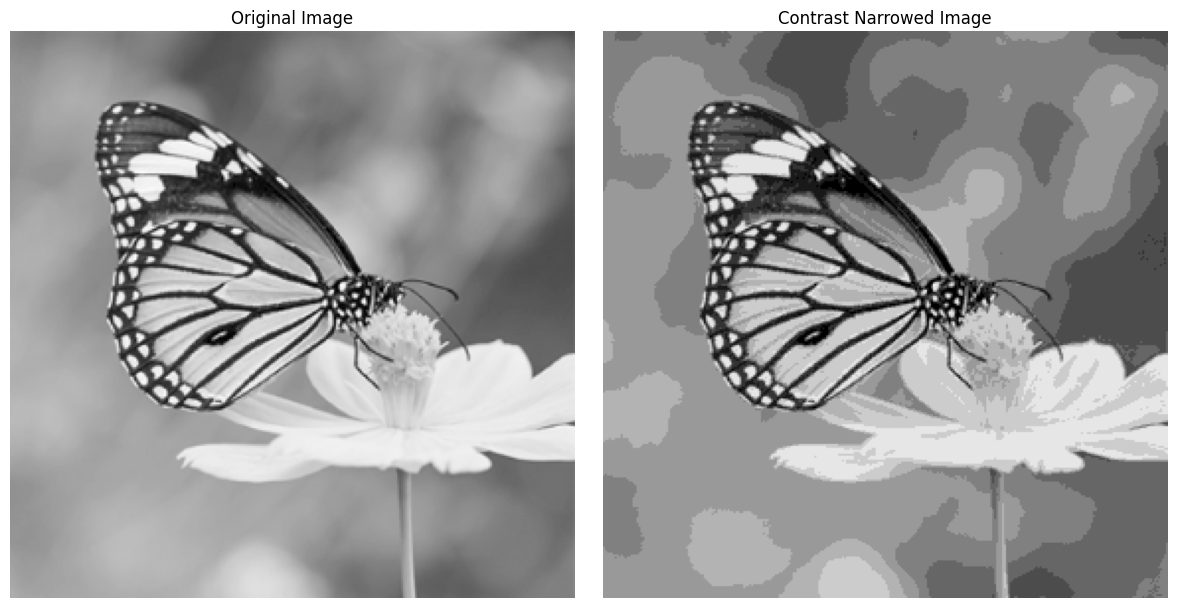

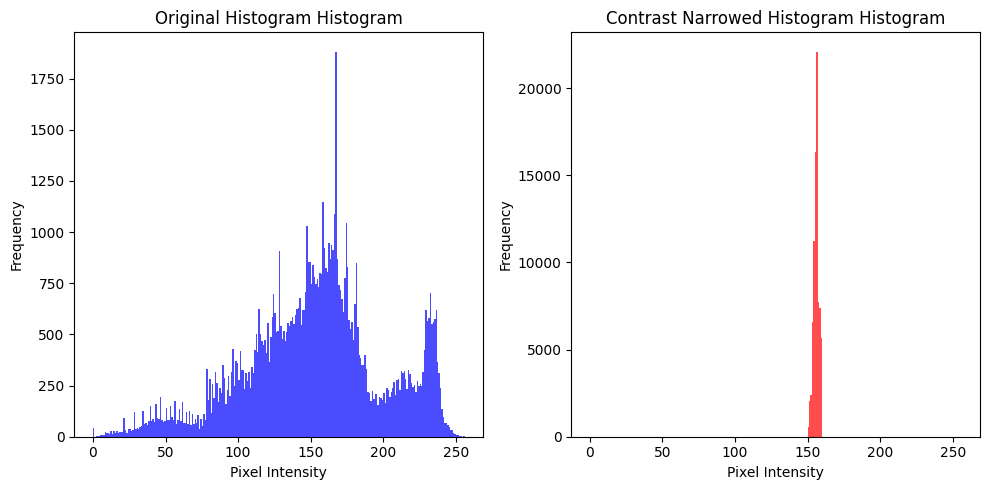

Kontrast Artırma İşlemi:


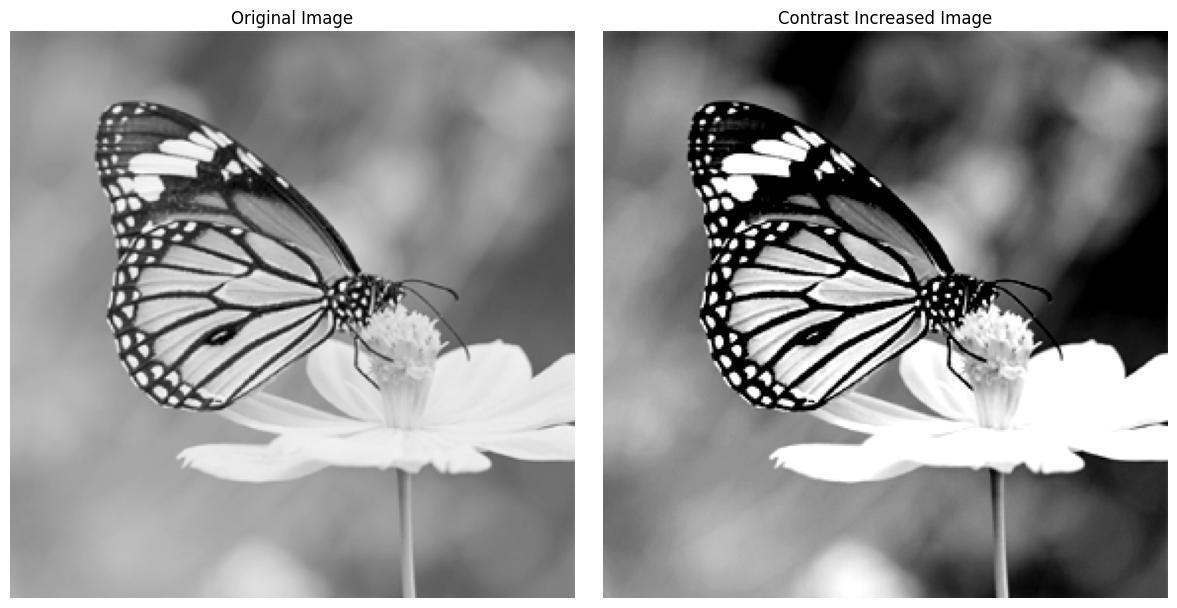

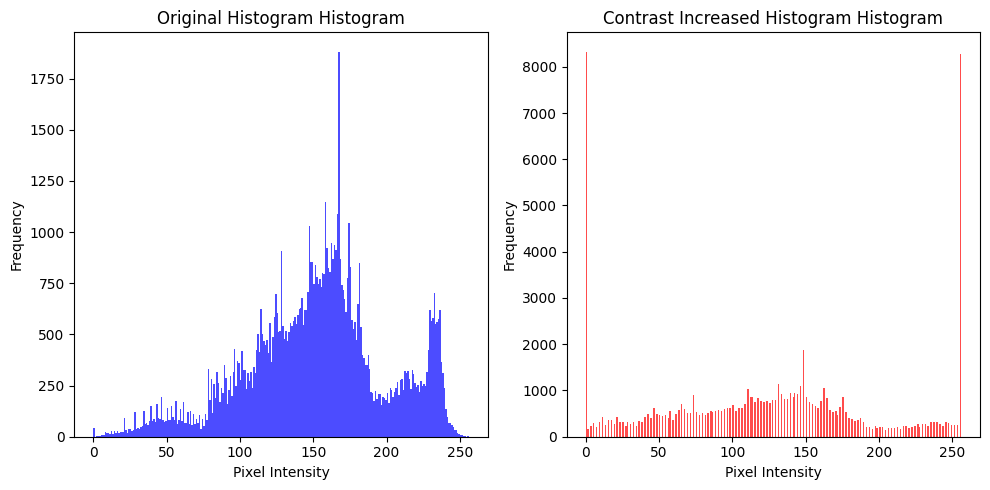


Hesaplanan Değerler:
a (Ortalama + 3 * Standart Sapma): 294.71
b (Ortalama - 3 * Standart Sapma): 9.37
a2 (Üst Yüzdelik - %90): 222.00
b2 (Alt Yüzdelik - %10): 90.00


In [2]:
# Kontrast Daraltma İşlemi
contrast_narrowed_image = contrast_narrow(original_image)

# Kontrast Artırma İşlemi
contrast_increased_image, a, b, q1, q2 = contrast_increase(original_image)

# Görselleştirme
print("Kontrast Daraltma İşlemi:")
plot_images(original_image, contrast_narrowed_image, "Original Image", "Contrast Narrowed Image")
plot_histograms(original_image, contrast_narrowed_image, "Original Histogram", "Contrast Narrowed Histogram")

print("Kontrast Artırma İşlemi:")
plot_images(original_image, contrast_increased_image, "Original Image", "Contrast Increased Image")
plot_histograms(original_image, contrast_increased_image, "Original Histogram", "Contrast Increased Histogram")

# Hesaplanan Değerlerin Sonuçları
print("\nHesaplanan Değerler:")
print(f"a (Ortalama + 3 * Standart Sapma): {a:.2f}")
print(f"b (Ortalama - 3 * Standart Sapma): {b:.2f}")
print(f"a2 (Üst Yüzdelik - %90): {q2:.2f}")
print(f"b2 (Alt Yüzdelik - %10): {q1:.2f}")